<a href="https://colab.research.google.com/github/Bakarime27/app-sante-public/blob/main/app_sante_public.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Concevoir une application au service de la santé publique**
Ce projet consiste à traiter les données **Open Food Facts** tout en ayant à l'idée de proposer une application qui répond à un appel à projet de la santé publique.



### **1.&nbsp;Description du dataset**
Le dataset contient la liste de plus de 300000 produits avec leurs ingrédients et les valeurs calorifiques et nutritionnelles.



*   Les colonnes qui se terminent en _t sont les dates sous le format unix timestamp
*   Les colonnes qui se terminent en _datetime sont les dates sous le format iso8601
*   Les colonnes qui se terminent en _100g correspondent à la quantité de nutriments contenue dans 100g ou 100ml de produit
*   Les colonnes qui se terminent avec _serving correspondent à la quantité de nutriments contenue dans une portion de produit 
*   nutrition-score-fr_100g correspond au score nutritionnel d'un produit variant de -15 à 40, plus bas est le score plus le produit est sain
*   nutrition_grade_fr_100g correspond à une simple catégorisation du nutriscore, les valeurs allant de A jusqu'à E





### **2.&nbsp;Nettoyage des données**

### **2.1.&nbsp; Chargement des données**

In [30]:
from google.colab import drive
#drive.mount("/gdrive", force_remount=True)
#drive.flush_and_unmount()
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Datasets
%ls

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/Datasets
fr.openfoodfacts.org.products.csv


In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t', low_memory=False)

In [33]:
print(f'Le dataset contient {df.shape[0]} lignes et {df.shape[1]} colonnes')

Le dataset contient 320772 lignes et 162 colonnes


In [34]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#df_test = df[['product_name','generic_name','countries']]
#df_test.tail(50)

### **2.2.&nbsp;Analyse des colonnes et lignes vides**
Nous allons identifier les colonnes qui contiennent le plus de valeurs nulles, nous allons ensuite regarder le taux de remplissage des variables graphiquement et fixer un seuil de supression à 20% de taux de remplissage

In [35]:
def remplissage(df):
    taux_de_null = ((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False).reset_index()
    taux_de_null.columns = ['Variables','Taux_de_null']
    taux_de_remplissage = pd.DataFrame(columns=['Variables','Taux_de_remplissage'])
    taux_de_remplissage['Variables'] = taux_de_null['Variables']
    taux_de_remplissage['Taux_de_remplissage'] = 100 - taux_de_null['Taux_de_null']
    return taux_de_remplissage
    

In [36]:
taux_de_remplissage = remplissage(df)
taux_de_remplissage = taux_de_remplissage.sort_values("Taux_de_remplissage", ascending=False)
taux_de_remplissage

,Variables,Taux_de_remplissage
161,last_modified_t,100.000000
160,last_modified_datetime,100.000000
159,creator,99.999377
158,created_t,99.999065
157,created_datetime,99.997194
...,...,...
12,cerotic-acid_100g,0.000000
13,melissic-acid_100g,0.000000
14,chlorophyl_100g,0.000000
15,glycemic-index_100g,0.000000


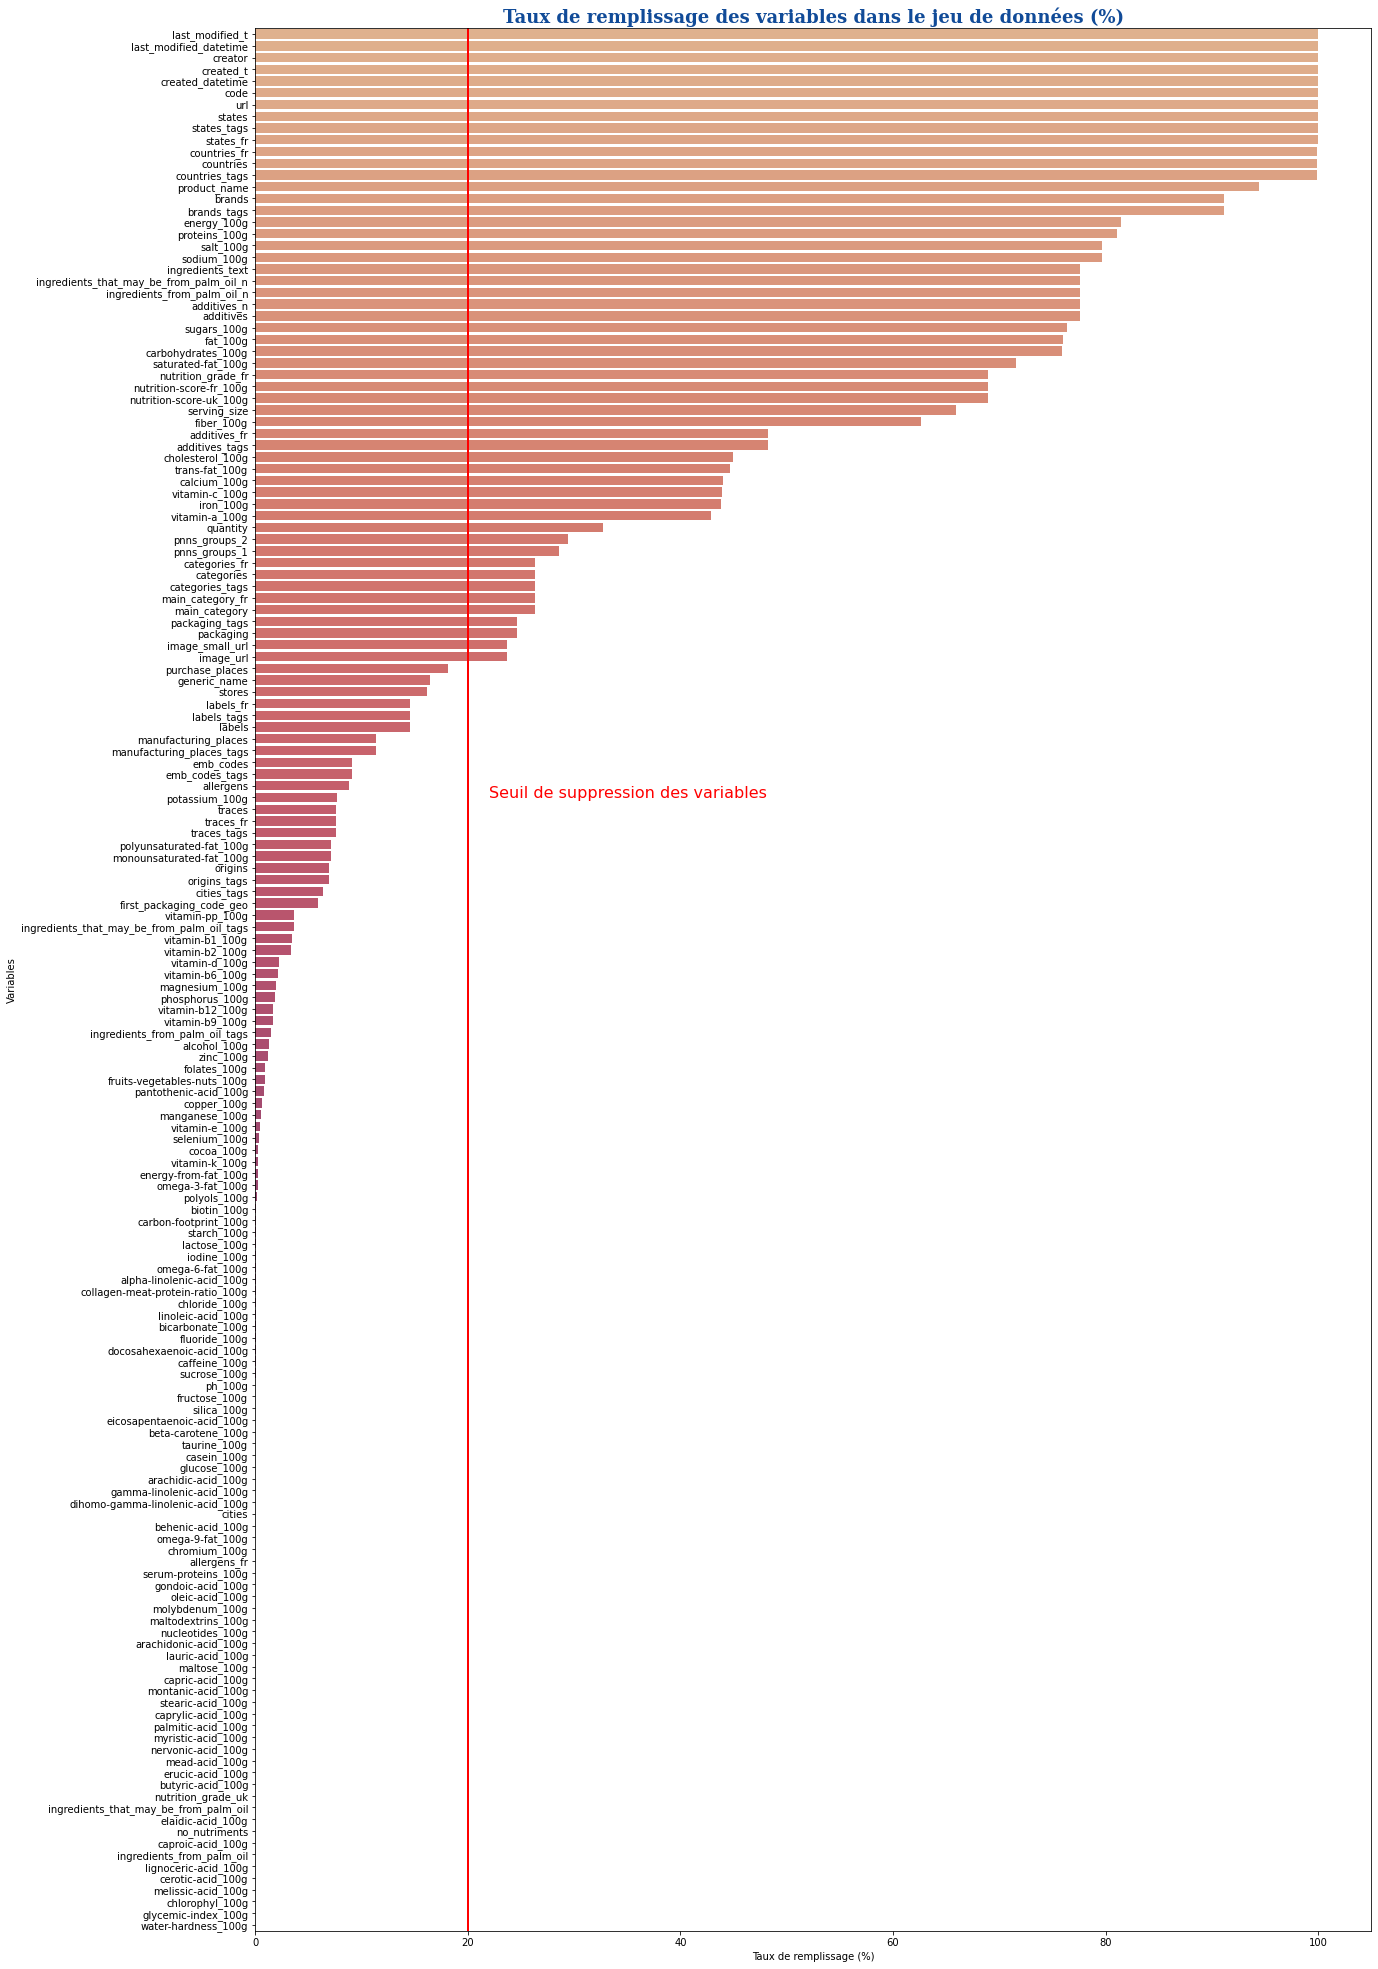

In [37]:
# Representation graphique

#Seuil de suppression
sup_threshold = 20

fig = plt.figure(figsize=(20, 35))

font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18,
             }

sns.barplot(x="Taux_de_remplissage", y="Variables", data=taux_de_remplissage, palette="flare")
#Ligne indiquand le seuil pour suppression des varaibles
plt.axvline(x=sup_threshold, linewidth=2, color = 'r')
plt.text(sup_threshold+2, 65, 'Seuil de suppression des variables', fontsize = 16, color = 'r')

plt.title("Taux de remplissage des variables dans le jeu de données (%)", fontdict=font_title)
plt.xlabel("Taux de remplissage (%)")
plt.show()


In [38]:
#Dataset avec les variables dont le taux de remplissage est suppérieur au seuil choisi
variable_a_conserver = list(taux_de_remplissage.loc[taux_de_remplissage['Taux_de_remplissage']>sup_threshold, 'Variables'].values)
df = df[variable_a_conserver]
df.head()

,last_modified_t,last_modified_datetime,creator,created_t,created_datetime,code,url,states,states_tags,states_fr,...,pnns_groups_1,categories_fr,categories,categories_tags,main_category_fr,main_category,packaging_tags,packaging,image_small_url,image_url
0,1474103893,2016-09-17T09:18:13Z,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1489069957,2017-03-09T14:32:37Z,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1489069957,2017-03-09T14:32:37Z,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1489055731,2017-03-09T10:35:31Z,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1489055653,2017-03-09T10:34:13Z,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Après suppression des colonnes dont le taux de remplissage est inferieur à 20%, il ne reste que 54 colonnes dans notre dataset. Nous allons maintenant analyser les lignes qui ne contiennent que des valeurs nulles

In [39]:
print(f'Il y a {df.isnull().all(axis=1).sum()} lignes vides dans le dataset')

Il y a 0 lignes vides dans le dataset


Vue qu'il n y aucune ligne, toutes colonnes comprises, ne contenant que des valeurs nulles, nous allons restreindre le dataset à certaines colonnes qui semblent pertinentes pour l'analyse

In [40]:
def verification_suffix(df, suffix='100_g'):
  colonnes_avec_suffix = []
  for col in df.columns:
      if suffix in col: colonnes_avec_suffix.append(col)
  df_sous_columns = df[colonnes_avec_suffix]
  return df_sous_columns

In [41]:
df_s = verification_suffix(df,'_100g')
df_s.head()

,energy_100g,proteins_100g,salt_100g,sodium_100g,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,fiber_100g,cholesterol_100g,trans-fat_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2243.0,3.57,0.00000,0.000,14.29,28.57,64.29,28.57,14.0,14.0,3.6,0.018,0.0,0.000,0.0214,0.00129,0.0
2,1941.0,17.86,0.63500,0.250,17.86,17.86,60.71,0.00,0.0,0.0,7.1,0.000,0.0,0.071,0.0000,0.00129,0.0
3,2540.0,17.86,1.22428,0.482,3.57,57.14,17.86,5.36,12.0,12.0,7.1,NaN,NaN,0.143,NaN,0.00514,NaN
4,1552.0,8.57,NaN,NaN,NaN,1.43,77.14,NaN,NaN,NaN,5.7,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
print(f'Il y a {df_s.isnull().all(axis=1).sum()} lignes vides dans le sous dataset')

Il y a 57939 lignes vides dans le sous dataset


In [43]:
# Dimensions du dataset avant suppression des lignes nulles
df.shape

(320772, 54)

In [44]:
# Suppression des lignes vides dans le dataset
# Dimensions du nouveau dataset
df = df[df_s.notnull().any(axis=1)]
df.shape


(262833, 54)

### **2.3.&nbsp;Variables redondantes**
Certaines variables dans le dataset sont en réalité des variables redondantes. C'est par exemple le cas des variables suffixées par _tags ou _fr qui ne font que reprendre d'autres colonnes traduites ou simplifiées.

In [45]:
colonnes_categories = ['categories','categories_tags','categories_fr']
df[df[colonnes_categories].notnull().any(axis=1)][['product_name'] + colonnes_categories].sample(5)

,product_name,categories,categories_tags,categories_fr
208697,Cacahuètes grillées et salées,"Cacahuètes,Cacahuètes grillées,Cacahuètes salées","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen..."
262182,9 Sushi Box Adachi,Sushi,"en:meals,fr:sushi","Plats préparés,Sushi"
209244,Maroilles Mignon (26 % MG),"Frais,Produits laitiers,Produits labellisés,Fr...","en:fresh-foods,en:dairies,en:labeled-products,...","Frais,Produits laitiers,Produits labellisés,Fr..."
310617,Bebida de soja ecológica &quot;NaturGreen&quot...,"Bebidas vegetales,Bebidas,Vegetales y derivado...","en:plant-based-foods-and-beverages,en:beverage...","Aliments et boissons à base de végétaux,Boisso..."
208192,Croq\'Soja Provençale,"Plats préparés d'origine végétale,Plats prépar...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen..."


On remarque dans ces quelques exemples que les variables sont bien redondantes. Nous allons donc, lorsque la colonne suffixée _fr existe, supprimer toutes les autres colonnes identiques non suffixées ou contenant _tags

In [46]:
def recherche_colonnes_redondantes(df):
  colonnes_redondantes = []
  for col in df.columns:
    if "_fr" in col:
      col_sans_fr = col.replace('_fr','')
      col_avec_tags = col.replace('_fr','_tags')
      if col_sans_fr in df.columns : 
        colonnes_redondantes.append(col_sans_fr)
      if col_avec_tags not in colonnes_redondantes:
        if col_avec_tags in df.columns : 
          colonnes_redondantes.append(col_avec_tags)
  
    if '_tags' in col:
      if col not in colonnes_redondantes:
        col_sans_tags = col.replace('_tags','')
        if col_sans_tags in df.columns :
          colonnes_redondantes.append(col)

  return colonnes_redondantes

In [47]:
#Liste des colonnes redondantes à supprimer
colonnes_redondantes = recherche_colonnes_redondantes(df)
colonnes_redondantes

['states_tags',
 'states',
 'countries',
 'countries_tags',
 'brands_tags',
 'additives',
 'additives_tags',
 'categories',
 'categories_tags',
 'main_category',
 'packaging_tags']

In [48]:
#Suppression des colonnes redondantes
df.drop(colonnes_redondantes, axis=1, inplace=True)
df.shape

(262833, 43)

Vue qu'on s'interesse au cas de la France, nous allons supprimer la colonne **nutrition-score-uk_100g**

In [51]:
df = df.drop(['nutrition-score-uk_100g'], axis=1)
df.shape

(262833, 40)

Les dates aussi comportent de la redondance, les mêmes dates sous présentes sous différents formats : 

*   unix timestamp
*   iso8601

Nous allons donc supprimer celles sous format uniux timestamp



In [50]:
df = df.drop(['created_t','last_modified_t'], axis=1)
df.shape

(262833, 41)

### **2.4.&nbsp;Recherche et suppression des doublons**
Nous allons identifier les doublons et les supprimer 

In [52]:
#Suppression des doublons en fonction du code
df.drop_duplicates(subset="code", keep = 'last', inplace=True)
df.shape

(262818, 40)

In [53]:
#Nombre de potentiels de doublons par nom de produit et marque
df[(df["product_name"].isnull()==False) & (df["brands"].isnull()==False)].groupby(by=["product_name","brands"])["code"].nunique().sort_values(ascending=False)

product_name                                               brands                                                                               
Icing Decorations                                          Wilton,  Wilton Enterprises Inc                                                          36
Premium Ice Cream                                          Weis                                                                                     35
Coca-Cola                                                  Coca-Cola                                                                                33
Icing Decorations                                          Wilton                                                                                   28
Aceite de oliva virgen extra &quot;Esencia Andalusí&quot;  Esencia Andalusí,//Propiedad de://,José Serrano López (Esencia Andalusí Gourmet S.L.)    23
                                                                                                    

In [54]:
df_r = df[(df['product_name'] == 'Coca-Cola') & (df['brands'] == 'Coca-Cola')]
df_r = df_r[['code','product_name','brands','quantity','categories_fr','energy_100g','sugars_100g','nutrition-score-fr_100g','nutrition_grade_fr']]
df_r

,code,product_name,brands,quantity,categories_fr,energy_100g,sugars_100g,nutrition-score-fr_100g,nutrition_grade_fr
59748,0049000050103,Coca-Cola,Coca-Cola,2 L,"Boissons,Boissons gazeuses,Sodas,Sodas au cola...",165.0,11.0,NaN,NaN
132382,07173404,Coca-Cola,Coca-Cola,355 ml,"Boissons,Boissons gazeuses,Sodas,Sodas au cola...",177.0,11.0,NaN,NaN
197101,3174780000363,Coca-Cola,Coca-Cola,50 cl,"Boissons,Boissons gazeuses,Sodas,Sodas au cola...",180.0,10.8,14.0,e
223471,3292090000016,Coca-Cola,Coca-Cola,2 l,"Boissons,Boissons gazeuses,Sodas,Sodas au cola...",176.0,10.6,14.0,e
269162,5000112521085,Coca-Cola,Coca-Cola,6 * 330 ml,"Boissons,Boissons gazeuses,Sodas,Sodas au cola...",180.0,10.6,14.0,e
269169,5000112535006,Coca-Cola,Coca-Cola,6 * 500 ml,"Boissons,Boissons gazeuses,Sodas,Sodas au cola...",180.0,10.6,14.0,e
269171,5000112545326,Coca-Cola,Coca-Cola,330 ml,"Boissons,Boissons gazeuses,Sodas,Sodas au cola...",180.0,10.6,14.0,e
269176,5000112546415,Coca-Cola,Coca-Cola,"1,25 l","Boissons,Boissons gazeuses,Sodas,Sodas au cola...",180.0,10.6,14.0,e
269181,5000112547689,Coca-Cola,Coca-Cola,"0,33 l","Boissons,Boissons gazeuses,Sodas,Sodas au cola...",180.0,10.6,NaN,NaN
269182,5000112547726,Coca-Cola,Coca-Cola,1.5 l,"Boissons,Boissons gazeuses,Sodas,Sodas au cola...",180.0,10.6,14.0,e


In [ ]:
# Suppression des doublons sur marque et produit en conservant les valeurs nulles
#df = df[(~df.duplicated(["product_name","brands"],keep="last")) | ((df['product_name'].isnull()) & (df['brands'].isnull()))]

### **2.5.&nbsp;Analyse des categories**
Nous allons maintenant nous intéresser à la catégorie des produits qui est représentée par 4 colonnes

In [55]:
df[['categories_fr','pnns_groups_1','pnns_groups_2','main_category_fr',]].sample(10)

,categories_fr,pnns_groups_1,pnns_groups_2,main_category_fr
296560,"Aliments et boissons à base de végétaux,Alimen...",Cereals and potatoes,Bread,Pains
317885,NaN,unknown,unknown,NaN
4773,NaN,NaN,NaN,NaN
56486,NaN,NaN,NaN,NaN
15818,NaN,NaN,NaN,NaN
292091,"Produits déshydratés,Plats préparés,Produits l...",Composite foods,One-dish meals,Soupes
75037,NaN,NaN,NaN,NaN
113541,NaN,NaN,NaN,NaN
199290,"Produits laitiers,Fromages,Fromages pasteurisé...",Milk and dairy products,Cheese,Fromages
94060,NaN,NaN,NaN,NaN


Nous allons nous intéresser au nombre total de catégories

In [26]:
#Fonction qui permet de séparer les mots
def separation_mots(df, column = 'categories_fr'):
  liste_de_mots = set()
  for mots in df[column].str.split(','):
    if isinstance(mots, float):
      continue
    liste_de_mots = set().union(mots, liste_de_mots)
  return list(liste_de_mots)

In [56]:
#Nombre total de catégories
categories = separation_mots(df = df, column = 'categories_fr')
print(f'{len(categories)} catégories sont représentées dans le jeu de données')

11224 catégories sont représentées dans le jeu de données


Nous allons maintenant nous intéresser aux catégories les plus représentées

In [57]:
df['categories_fr'] = np.where((df['categories_fr'].isnull()==True), "inconnu", np.where(df['categories_fr'] == "", "inconnu", df['categories_fr']))
df['main_category_fr'] = np.where((df['main_category_fr'].isnull()==True), "inconnu", np.where(df['main_category_fr'] == "", "inconnu", df['main_category_fr']))
df['pnns_groups_1'] = np.where((df['pnns_groups_1'].isnull()==True), "inconnu", np.where(df['pnns_groups_1'] == "", "inconnu", df['pnns_groups_1']))
df['pnns_groups_2'] = np.where((df['pnns_groups_2'].isnull()==True), "inconnu", np.where(df['pnns_groups_2'] == "", "inconnu", df['pnns_groups_2']))

In [58]:
#Fonctions pour visualiser les catégories les plus représentées
def top_mots(df, column="categories_fr", nb_top=10):
  decompte_mots = dict()
  for i, col in df[column].iteritems():
    if isinstance(col, float):
      continue
    for mots in col.split(','):
      if mots in decompte_mots.keys():
        decompte_mots[mots] += 1
      else :
        decompte_mots[mots] = 1
  
  list_top_mots = []
  for k,v in decompte_mots.items():
    list_top_mots.append([k,v])
  list_top_mots.sort(key = lambda x:x[1], reverse = True)

  return list_top_mots[:nb_top]

from wordcloud import WordCloud

def graphe_world_cloud(df=df,column="categories_fr",nb_top=100):
  fig = plt.figure(1, figsize=(20,15))
  ax1 = fig.add_subplot(1,1,1)

  mots = dict()
  occurences = top_mots(df=df, column=column, nb_top=nb_top)
  for s in occurences:
    mots[s[0]] = s[1]

  word_cloud = WordCloud(width=900,height=500, normalize_plurals=False,
                        background_color="white")
  word_cloud.generate_from_frequencies(mots)
  ax1.imshow(word_cloud, interpolation="bilinear")
  ax1.axis('off')
  plt.title("Nuage de mots des {} meilleures {}\n".format(nb_top, column), fontsize=22)
  plt.show()

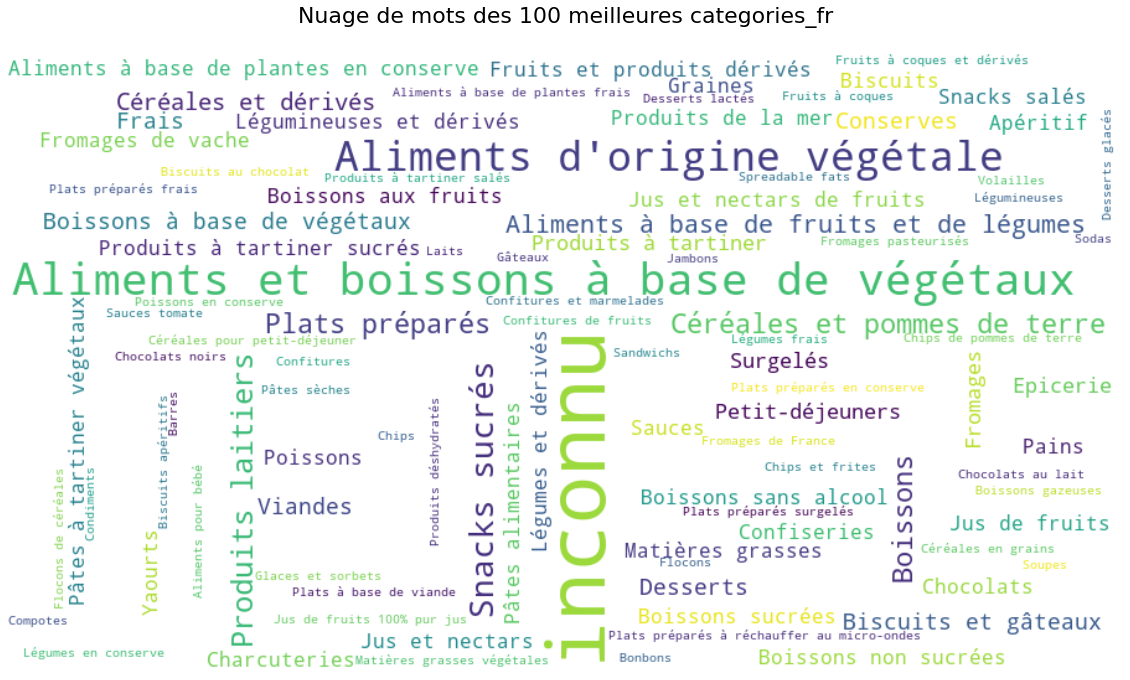

In [59]:
graphe_world_cloud(df=df,column="categories_fr",nb_top=100)

Nous allons nous intéresser aux colonnes pnns_groups_1 et pnns_groups_2 

In [60]:
pnns_groups_1 = separation_mots(df = df, column = 'pnns_groups_1')
pnns_groups_2 = separation_mots(df = df, column = 'pnns_groups_2')
print("{} catégories sont représentées dans la variable pnns_group_1.".format(len(pnns_groups_1)))
print("{} catégories sont représentées dans la variable pnns_group_2.".format(len(pnns_groups_2)))

15 catégories sont représentées dans la variable pnns_group_1.
43 catégories sont représentées dans la variable pnns_group_2.


In [61]:
pnns_groups_1

['fruits-and-vegetables',
 'unknown',
 'Sugary snacks',
 'cereals-and-potatoes',
 'sugary-snacks',
 'Fish Meat Eggs',
 'Fruits and vegetables',
 'Cereals and potatoes',
 'Salty snacks',
 'Fat and sauces',
 'salty-snacks',
 'Beverages',
 'Milk and dairy products',
 'inconnu',
 'Composite foods']

Certaines catégories sont redondantes

*   Fruits and vegetables et fruits-and-vegetables
*   Cereals and potatoes et cereals-and-potatoes


In [62]:
df["pnns_groups_1"] = df["pnns_groups_1"].str.lower().str.replace('-', ' ')
pnns_groups_1 = separation_mots(df = df, column = 'pnns_groups_1')
print("{} catégories sont représentées dans la variable pnns_group_1.".format(len(pnns_groups_1)))

11 catégories sont représentées dans la variable pnns_group_1.


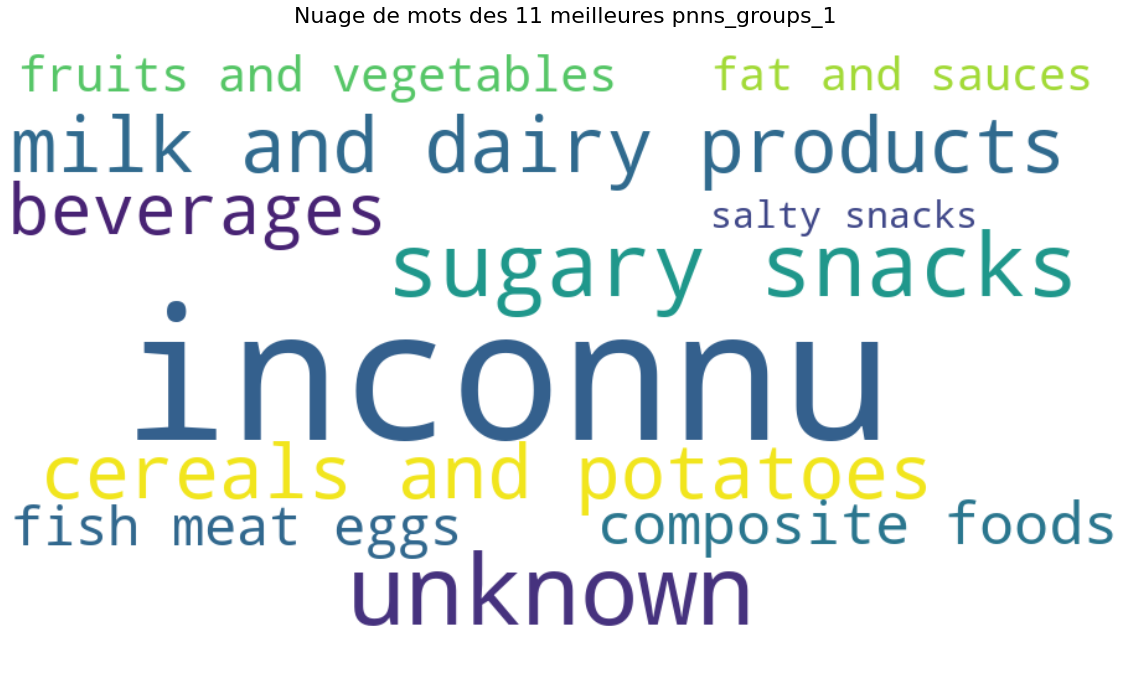

In [63]:
graphe_world_cloud(df=df,column="pnns_groups_1",nb_top=len(pnns_groups_1))

In [64]:
pnns_groups_2

['Potatoes',
 'Eggs',
 'nuts',
 'unknown',
 'Nuts',
 'Sandwich',
 'Appetizers',
 'fruits',
 'Sweetened beverages',
 'Legumes',
 'Fruit nectars',
 'cereals',
 'Bread',
 'Cereals',
 'Ice cream',
 'Biscuits and cakes',
 'Vegetables',
 'vegetables',
 'Processed meat',
 'Salty and fatty products',
 'Artificially sweetened beverages',
 'Cheese',
 'Sweets',
 'Dried fruits',
 'Dressings and sauces',
 'Dairy desserts',
 'legumes',
 'Fats',
 'Chocolate products',
 'Non-sugared beverages',
 'Milk and yogurt',
 'Fish and seafood',
 'Alcoholic beverages',
 'Fruit juices',
 'One-dish meals',
 'pastries',
 'Tripe dishes',
 'Pizza pies and quiche',
 'Soups',
 'Fruits',
 'Meat',
 'Breakfast cereals',
 'inconnu']

In [65]:
df["pnns_groups_2"] = df["pnns_groups_2"].str.lower().str.replace('-', ' ')
pnns_groups_2 = separation_mots(df = df, column = 'pnns_groups_2')
print("{} catégories sont représentées dans la variable pnns_group_2.".format(len(pnns_groups_2)))

38 catégories sont représentées dans la variable pnns_group_2.


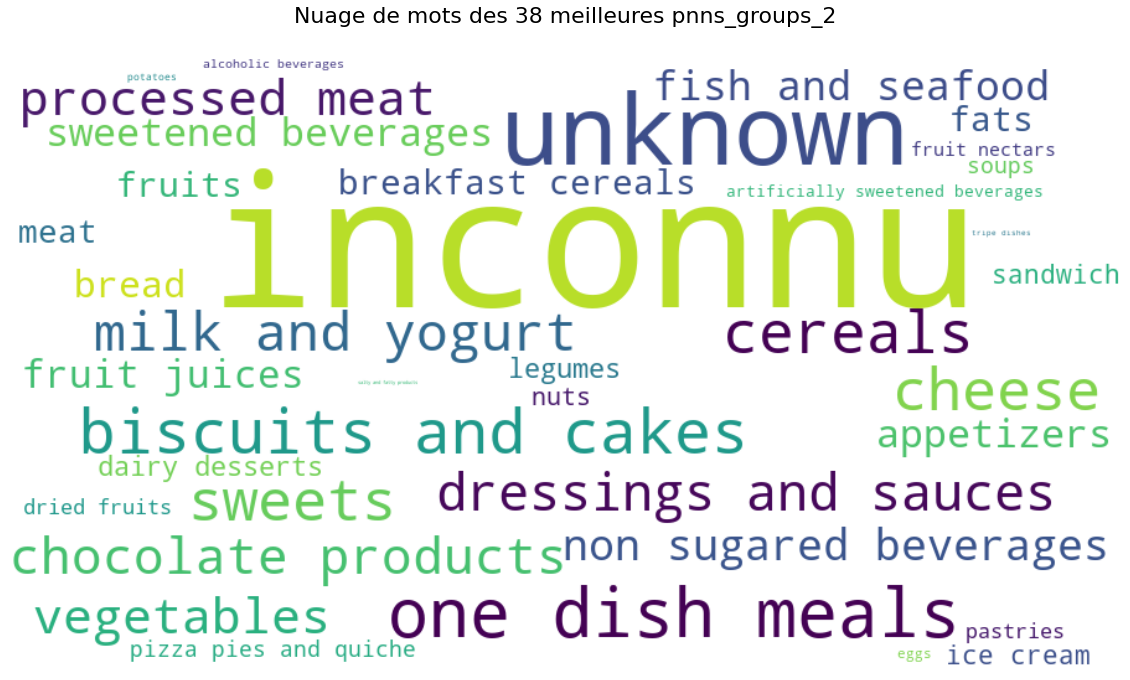

In [66]:
graphe_world_cloud(df=df,column="pnns_groups_2",nb_top=len(pnns_groups_2))


In [67]:
print(f'Le dataset contient {df.shape[0]} lignes et {df.shape[1]} colonnes')

Le dataset contient 262818 lignes et 40 colonnes


Notre idée d'application est de fournir un score basé uniquement sur le taux de sucre des produits que l'on souhaite donner aux petits enfants, et aussi faire des recommendations de produits de la même catégories.  
La valeur ajoutée de notre application est qu'elle se positionne en complément du nutrigrade dans la mesure où certains produits ont une bonne note mais contiennent un taux de sucre trop élevé pour les petits enfants. Selon l'OMS un seuil de 12g par jour est recommandé [creapharma](https://www.creapharma.ch/news/quantite-sucre-depasser-jour.htm).  
Nous ne prenons en compte que quelques catégories liées à l'alimentation des petits enfants

In [68]:
#'pnns_groups_1', 'pnns_groups_2' colonnes à utiliser pour le filtrage
df_filtre = df.loc[(df['countries_fr'].str.contains("France", case=False)) & (df['categories_fr'].str.contains("Snacks|Tartiner|Petit-déjeuners|Fruits|Fruit|Compotes|Compote|Desserts|Bonbons|Biscuits|Gateaux|Patisseries|Lait|Milk|Boisson|Boissons|Sirop|Sirops|Jus|Soda|Beverage|Beverages|Drink|Drinks|Juice|Juices|Yaourt|Yaourts|Sucrées|Sucrés|Céréals|Yoghourt|Yoghourts|Cereals|Chocolat|Chocolate", case=False)) & ~(df['categories_fr'].str.contains("Alcool|Alcools|Alcohol|Alcohols|alcoolisées|Bières|alcoolisée|Bière|Alcoolisées|bières|Alcoolisée|bière", case=False))]
print(f'Le dataset filtré sur la base des catégories de produits alimentaires pour enfants contient {df_filtre.shape[0]} lignes et {df_filtre.shape[1]} colonnes')

#Nous selectionnons quelques colonnes pertinentes pour justifier notre idée d'application
df_filtre_colonne = df_filtre[['product_name', 'categories_fr', 'nutrition-score-fr_100g', 'nutrition_grade_fr', 'sugars_100g']]

#Nous montrons en effet que certains produits ont un bon nutrigrade avec par contre un taux de sucre au delà du seuil tolerable recommandé(12g) pour les enfants
df_filtre_colonne = df_filtre_colonne[df_filtre_colonne['sugars_100g'].notna() & df_filtre_colonne['sugars_100g'].ge(12) & df_filtre_colonne['nutrition_grade_fr'].le('c') ]
print(f'Le dataset filtré sur la base du taux de sucre superieur à 12g et le nutrigrade entre a et c contient {df_filtre_colonne.shape[0]} lignes et {df_filtre_colonne.shape[1]} colonnes')
df_filtre_colonne.head(100)


Le dataset filtré sur la base des catégories de produits alimentaires pour enfants contient 31693 lignes et 40 colonnes
Le dataset filtré sur la base du taux de sucre superieur à 12g et le nutrigrade entre a et c contient 3631 lignes et 5 colonnes


,product_name,categories_fr,nutrition-score-fr_100g,nutrition_grade_fr,sugars_100g
13108,Jackfruit in syrup,"Aliments et boissons à base de végétaux,Alimen...",0.0,b,17.86
19570,Crème de marrons de l'Ardèche,"Aliments et boissons à base de végétaux,Alimen...",10.0,c,50.20
20616,Ananas en morceaux au jus,"Aliments et boissons à base de végétaux,Alimen...",-3.0,a,13.10
20632,Poires demi-fruits au sirop léger,"Aliments et boissons à base de végétaux,Alimen...",-3.0,a,14.00
20800,Tranches d'Ananas au jus d'Ananas,"Aliments et boissons à base de végétaux,Alimen...",-3.0,a,13.10
...,...,...,...,...,...
177699,Müsli Schoko,"Aliments et boissons à base de végétaux,Alimen...",9.0,c,26.10
177700,Früchte - Müsli,"Aliments et boissons à base de végétaux,Alimen...",1.0,b,24.50
177777,Boules céréales au cacao,"Aliments et boissons à base de végétaux,Alimen...",7.0,c,26.90
177778,Fruit hoops,"Aliments et boissons à base de végétaux,Alimen...",7.0,c,25.00


### **2.6.&nbsp;Gestion des valeurs manquantes et aberrantes**

In [69]:
df_filtre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31693 entries, 226 to 320763
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   last_modified_datetime                   31693 non-null  object 
 1   creator                                  31693 non-null  object 
 2   created_datetime                         31692 non-null  object 
 3   code                                     31693 non-null  object 
 4   url                                      31693 non-null  object 
 5   states_fr                                31693 non-null  object 
 6   countries_fr                             31693 non-null  object 
 7   product_name                             31607 non-null  object 
 8   brands                                   31602 non-null  object 
 9   energy_100g                              31133 non-null  float64
 10  proteins_100g                            30

Le dataset contient plusieurs colonnes avec des valeurs manquantes qu'il nous faut gérer

In [70]:
df_filtre.describe()

,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition-score-fr_100g,fiber_100g,cholesterol_100g,trans-fat_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g
count,31133.000000,30962.000000,29916.000000,29914.000000,28210.000000,28210.000000,28210.000000,29935.000000,29557.000000,29218.000000,29818.000000,29330.000000,20377.000000,275.000000,273.000000,1990.000000,634.000000,901.000000,375.000000
mean,1248.097380,6.544372,0.707522,0.278569,0.180220,0.098263,1.940305,16.742018,14.687138,35.044646,6.346129,8.990078,3.170509,0.051438,0.281333,0.326744,0.028873,0.054061,0.000650
std,838.315381,6.461270,3.025006,1.190860,0.500974,0.302753,2.585457,20.107102,18.434529,28.679624,9.396441,9.615795,4.238883,0.657408,1.161983,1.778065,0.056434,0.866555,0.006188
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,407.000000,1.500000,0.030000,0.011811,0.000000,0.000000,0.000000,1.800000,1.000000,5.807500,0.200000,1.000000,0.500000,0.000000,0.000000,0.120000,0.009805,0.003000,0.000064
50%,1370.000000,5.400000,0.228600,0.090000,0.000000,0.000000,1.000000,7.000000,7.000000,32.750000,2.000000,10.000000,2.100000,0.000000,0.000000,0.130000,0.014000,0.006130,0.000200
75%,1858.000000,8.600000,0.910000,0.358268,0.000000,0.000000,3.000000,27.000000,24.000000,61.000000,10.300000,16.000000,4.200000,0.001000,0.276000,0.350000,0.031750,0.008000,0.000602
max,18700.000000,93.100000,211.000000,83.000000,5.000000,2.000000,31.000000,105.000000,380.000000,190.000000,210.000000,40.000000,86.200000,10.900000,17.200000,69.500000,1.200000,25.000000,0.120000


In [71]:
df_filtre[df_filtre['energy_100g'] == df_filtre['energy_100g'].max()]

,last_modified_datetime,creator,created_datetime,code,url,states_fr,countries_fr,product_name,brands,energy_100g,...,iron_100g,vitamin-a_100g,quantity,pnns_groups_2,pnns_groups_1,categories_fr,main_category_fr,packaging,image_small_url,image_url
245311,2017-04-07T21:58:05Z,bonifacefr,2014-08-09T15:52:34Z,3596710288755,http://world-fr.openfoodfacts.org/produit/3596...,"A compléter,Informations nutritionnelles compl...",France,mini choux goût fromage de chèvre - poivre,Auchan,18700.0,...,NaN,NaN,60 g,appetizers,salty snacks,"Snacks salés,Apéritif,Biscuits apéritifs,Produ...",Snacks salés,"étui carton,film plastique",NaN,NaN


In [72]:
df_filtre[df_filtre['fat_100g'] == df_filtre['fat_100g'].max()]

,last_modified_datetime,creator,created_datetime,code,url,states_fr,countries_fr,product_name,brands,energy_100g,...,iron_100g,vitamin-a_100g,quantity,pnns_groups_2,pnns_groups_1,categories_fr,main_category_fr,packaging,image_small_url,image_url
245311,2017-04-07T21:58:05Z,bonifacefr,2014-08-09T15:52:34Z,3596710288755,http://world-fr.openfoodfacts.org/produit/3596...,"A compléter,Informations nutritionnelles compl...",France,mini choux goût fromage de chèvre - poivre,Auchan,18700.0,...,NaN,NaN,60 g,appetizers,salty snacks,"Snacks salés,Apéritif,Biscuits apéritifs,Produ...",Snacks salés,"étui carton,film plastique",NaN,NaN


In [73]:
df_filtre[df_filtre['saturated-fat_100g'] == df_filtre['saturated-fat_100g'].max()]

,last_modified_datetime,creator,created_datetime,code,url,states_fr,countries_fr,product_name,brands,energy_100g,...,iron_100g,vitamin-a_100g,quantity,pnns_groups_2,pnns_groups_1,categories_fr,main_category_fr,packaging,image_small_url,image_url
245311,2017-04-07T21:58:05Z,bonifacefr,2014-08-09T15:52:34Z,3596710288755,http://world-fr.openfoodfacts.org/produit/3596...,"A compléter,Informations nutritionnelles compl...",France,mini choux goût fromage de chèvre - poivre,Auchan,18700.0,...,NaN,NaN,60 g,appetizers,salty snacks,"Snacks salés,Apéritif,Biscuits apéritifs,Produ...",Snacks salés,"étui carton,film plastique",NaN,NaN


In [74]:
df_filtre[df_filtre['carbohydrates_100g'] == df_filtre['carbohydrates_100g'].max()]

,last_modified_datetime,creator,created_datetime,code,url,states_fr,countries_fr,product_name,brands,energy_100g,...,iron_100g,vitamin-a_100g,quantity,pnns_groups_2,pnns_groups_1,categories_fr,main_category_fr,packaging,image_small_url,image_url
245311,2017-04-07T21:58:05Z,bonifacefr,2014-08-09T15:52:34Z,3596710288755,http://world-fr.openfoodfacts.org/produit/3596...,"A compléter,Informations nutritionnelles compl...",France,mini choux goût fromage de chèvre - poivre,Auchan,18700.0,...,NaN,NaN,60 g,appetizers,salty snacks,"Snacks salés,Apéritif,Biscuits apéritifs,Produ...",Snacks salés,"étui carton,film plastique",NaN,NaN


On se rend compte que le même produit (code = 3596710288755) à une valeur maximale dans plusieurs colonnes energy_100g, fat_100g, saturated-fat_100g, carbohydrates_100g

In [75]:
df_filtre[df_filtre['salt_100g'] == df_filtre['salt_100g'].max()]

,last_modified_datetime,creator,created_datetime,code,url,states_fr,countries_fr,product_name,brands,energy_100g,...,iron_100g,vitamin-a_100g,quantity,pnns_groups_2,pnns_groups_1,categories_fr,main_category_fr,packaging,image_small_url,image_url
232239,2017-02-01T21:21:33Z,bea51,2016-09-23T12:21:10Z,3423720002432,http://world-fr.openfoodfacts.org/produit/3423...,"A compléter,Informations nutritionnelles compl...",France,Keeny Bio,Bio Soleil,1720.0,...,NaN,NaN,135 g,biscuits and cakes,sugary snacks,"Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...",Gâteaux,Paquet individuel,NaN,NaN


In [76]:
df_filtre.loc[df_filtre['code'] == '3423720002432',['product_name','brands','nutrition_grade_fr','sugars_100g','energy_100g']]

,product_name,brands,nutrition_grade_fr,sugars_100g,energy_100g
232239,Keeny Bio,Bio Soleil,e,26.7,1720.0


In [77]:
df_filtre[df_filtre['sugars_100g'] == df_filtre['sugars_100g'].max()]

,last_modified_datetime,creator,created_datetime,code,url,states_fr,countries_fr,product_name,brands,energy_100g,...,iron_100g,vitamin-a_100g,quantity,pnns_groups_2,pnns_groups_1,categories_fr,main_category_fr,packaging,image_small_url,image_url
239347,2017-03-10T11:23:31Z,sebleouf,2015-02-09T17:21:01Z,3560070740338,http://world-fr.openfoodfacts.org/produit/3560...,"A vérifier,Complet,Informations nutritionnelle...",France,Sirop d'agave,Carrefour Bio,1785.0,...,NaN,NaN,250 ml,sweets,sugary snacks,"Produits à tartiner,Petit-déjeuners,Produits à...",Produits à tartiner sucrés,"Flacon,Plastique,flacon",http://fr.openfoodfacts.org/images/products/35...,http://fr.openfoodfacts.org/images/products/35...


In [78]:
df_filtre.loc[df_filtre['code'] == '3560070740338',['product_name','brands','nutrition_grade_fr','salt_100g','energy_100g']]

,product_name,brands,nutrition_grade_fr,salt_100g,energy_100g
239347,Sirop d'agave,Carrefour Bio,NaN,NaN,1785.0


## **2.6.1.&nbsp;Gestion des valeurs aberrantes**


Nous allons supprimer les produits dont les colonnes qui contiennent des valeurs négatives à l'exception de la colonne nutrition-score-fr_100g

In [79]:
colonnes_numeric = list(df_filtre.select_dtypes(include=["float64","int64"]).columns)
colonnes_numeric.remove('nutrition-score-fr_100g')
colonnes_numeric

['energy_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_from_palm_oil_n',
 'additives_n',
 'sugars_100g',
 'fat_100g',
 'carbohydrates_100g',
 'saturated-fat_100g',
 'fiber_100g',
 'cholesterol_100g',
 'trans-fat_100g',
 'calcium_100g',
 'vitamin-c_100g',
 'iron_100g',
 'vitamin-a_100g']

In [80]:
#On supprime les lignes contenant des valeurs negatives
df_filtre = df_filtre[~(df_filtre[colonnes_numeric] < 0).any(axis=1)]
df_filtre.shape

(31692, 40)

Les colonnes suffixées avec _100g nous indiquent la quantité de nutriment pour 100 grammes de produit. Les valeurs ne peuvent donc pas être supérieur à 100.

In [81]:
#On supprime les lignes dont les valeurs sont superieur à 100
g_pour_100g = ['energy_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'sugars_100g', 'fat_100g', 'carbohydrates_100g', 'saturated-fat_100g', 'fiber_100g', 'cholesterol_100g', 'trans-fat_100g', 'calcium_100g', 'vitamin-c_100g', 'iron_100g', 'vitamin-a_100g']
df_filtre = df_filtre[~(df_filtre[g_pour_100g] > 100).any(axis=1)]
df_filtre.shape

(2182, 40)

Selon [Wikipedia](https://en.wikipedia.org/wiki/Food_energy) la densité d'energie maximales pour 100g est de 3700 kJ/100g .

In [82]:
#Nous n'avons aucune ligne dont la variable energy_100g est supérieur à 3700
df_filtre = df_filtre[~(df_filtre['energy_100g'] > 3700)]
df_filtre.shape

(2182, 40)

Nous allons maintenant utiliser la mediane et l'écart-type pour traiter les avaleurs aberrantes dans les colonnes numeriques restantes

In [83]:
colonnes_numeric_restantes = ['ingredients_that_may_be_from_palm_oil_n', 'ingredients_from_palm_oil_n', 'additives_n']

#On initialise l'écart-type et la médiane
ecart_type = [0 for _ in range(len(colonnes_numeric_restantes))]
mediane = [0 for _ in range(len(colonnes_numeric_restantes))]

#Puis on complètes les valeurs avec le dataset sans les valeurs nulles
for i in range(len(colonnes_numeric_restantes)):
  mediane[i] = df_filtre[pd.notnull(df_filtre[colonnes_numeric_restantes[i]])][colonnes_numeric_restantes[i]].median()
  serie = df_filtre[pd.notnull(df_filtre[colonnes_numeric_restantes[i]])][colonnes_numeric_restantes[i]]
  serie = serie.sort_values()
  ecart_type[i] = np.std(serie[:-25])

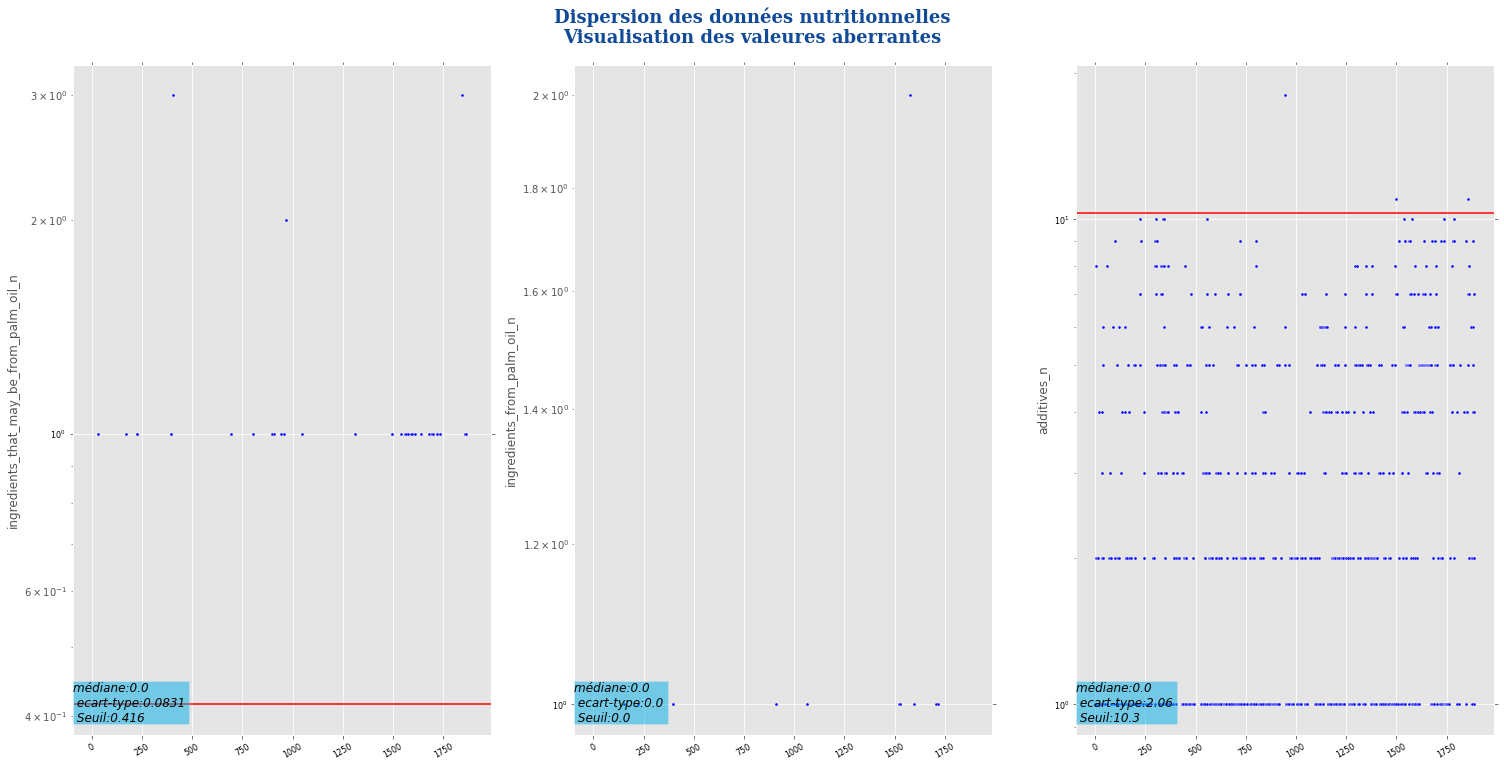

In [84]:
#Représentation graphique des valeures aberrantes

plt.style.use('ggplot')
tPlot, axes = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=False, figsize=(21,10))
axes = np.array(axes)

i=0
for ax in axes.reshape(-1):
    colonne = colonnes_numeric_restantes[i]
    test = df_filtre[pd.notnull(df_filtre[colonne])][colonne]
    ax.tick_params(labelcolor='black',top='off',bottom='on',left='on',right='off',labelsize=8)
    ax.set_ylabel(colonne.rstrip("_100g"), fontsize = 12)
    ax.set_yscale("log")
    ax.plot(list(test), 'b.', markeredgewidth = 0.3, markeredgecolor='w')
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    ax.axhline(y=mediane[i], color='g', linestyle='dashdot')
    ax.axhline(y=mediane[i] + 5*ecart_type[i], color='r', linestyle='-')
    ax.text(0., 0.02, 'médiane:{:.3} \n ecart-type:{:.3} \n Seuil:{:.3}'.format(mediane[i], ecart_type[i], (mediane[i] + 5*ecart_type[i])),
            style='italic', transform=ax.transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})
    i += 1
tPlot.text(0.5, 1.01, r"Dispersion des données nutritionnelles" "\n" "Visualisation des valeures aberrantes", ha='center', fontdict=font_title)
plt.tight_layout()

In [85]:
#Suppression de lignes si la valeur est superieur à la mediane plus 5 fois l'ecart-type (mediane + 5*ecart-type)
for i in range(len(colonnes_numeric_restantes)):
    col = colonnes_numeric_restantes[i]
    seuil = (mediane[i] + 5*ecart_type[i])
    test_sup = df_filtre[col] > seuil
    df_filtre = df_filtre.drop(df_filtre[test_sup].index)
df_filtre.shape

(2134, 40)

In [86]:
df_filtre.describe()

,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition-score-fr_100g,fiber_100g,cholesterol_100g,trans-fat_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g
count,1591.000000,1595.000000,1591.000000,1589.000000,1845.0,1845.0,1845.000000,1570.000000,1760.000000,1452.000000,1487.000000,1476.000000,1132.000000,9.0,4.0,113.000000,31.000000,13.000000,8.000000
mean,50.287869,0.834584,1.238380,0.488149,0.0,0.0,1.395122,3.743439,5.747274,2.694755,0.152238,0.200542,0.983761,0.0,0.0,0.059773,0.018578,0.002181,0.015035
std,36.255924,1.571943,9.213501,3.629692,0.0,0.0,2.102957,11.434109,13.545263,8.333100,1.387476,4.275166,1.459780,0.0,0.0,0.127875,0.016065,0.002553,0.042412
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-11.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.002406,0.000950,0.0,0.0,0.000000,0.020000,0.000000,0.300000,0.000000,-3.000000,0.000000,0.0,0.0,0.004700,0.008250,0.000000,0.000000
50%,61.000000,0.500000,0.030000,0.011811,0.0,0.0,0.000000,0.700000,0.100000,1.300000,0.000000,1.000000,0.500000,0.0,0.0,0.015300,0.015600,0.002160,0.000030
75%,82.000000,1.200000,0.508000,0.200000,0.0,0.0,2.000000,2.700000,0.500000,3.000000,0.100000,2.000000,1.900000,0.0,0.0,0.048000,0.022000,0.003400,0.000105
max,100.000000,27.000000,100.000000,39.370079,0.0,0.0,10.000000,86.000000,100.000000,99.000000,29.900000,15.000000,27.000000,0.0,0.0,0.970000,0.072000,0.007000,0.120000


## **2.6.1.&nbsp;Gestion des valeurs manquantes**


Nous allons maintenant nous interesser à la distribution des variables, selon qu'elles suivent la loi normale ou pas, nous appliquerons une méthode d'imputation adaptée

In [87]:
#Vue qu'il n y a que des valeurs égales à 0
colonnes_numeric.remove('ingredients_that_may_be_from_palm_oil_n')
colonnes_numeric.remove('ingredients_from_palm_oil_n')
colonnes_numeric.remove('cholesterol_100g')
colonnes_numeric.remove('trans-fat_100g')

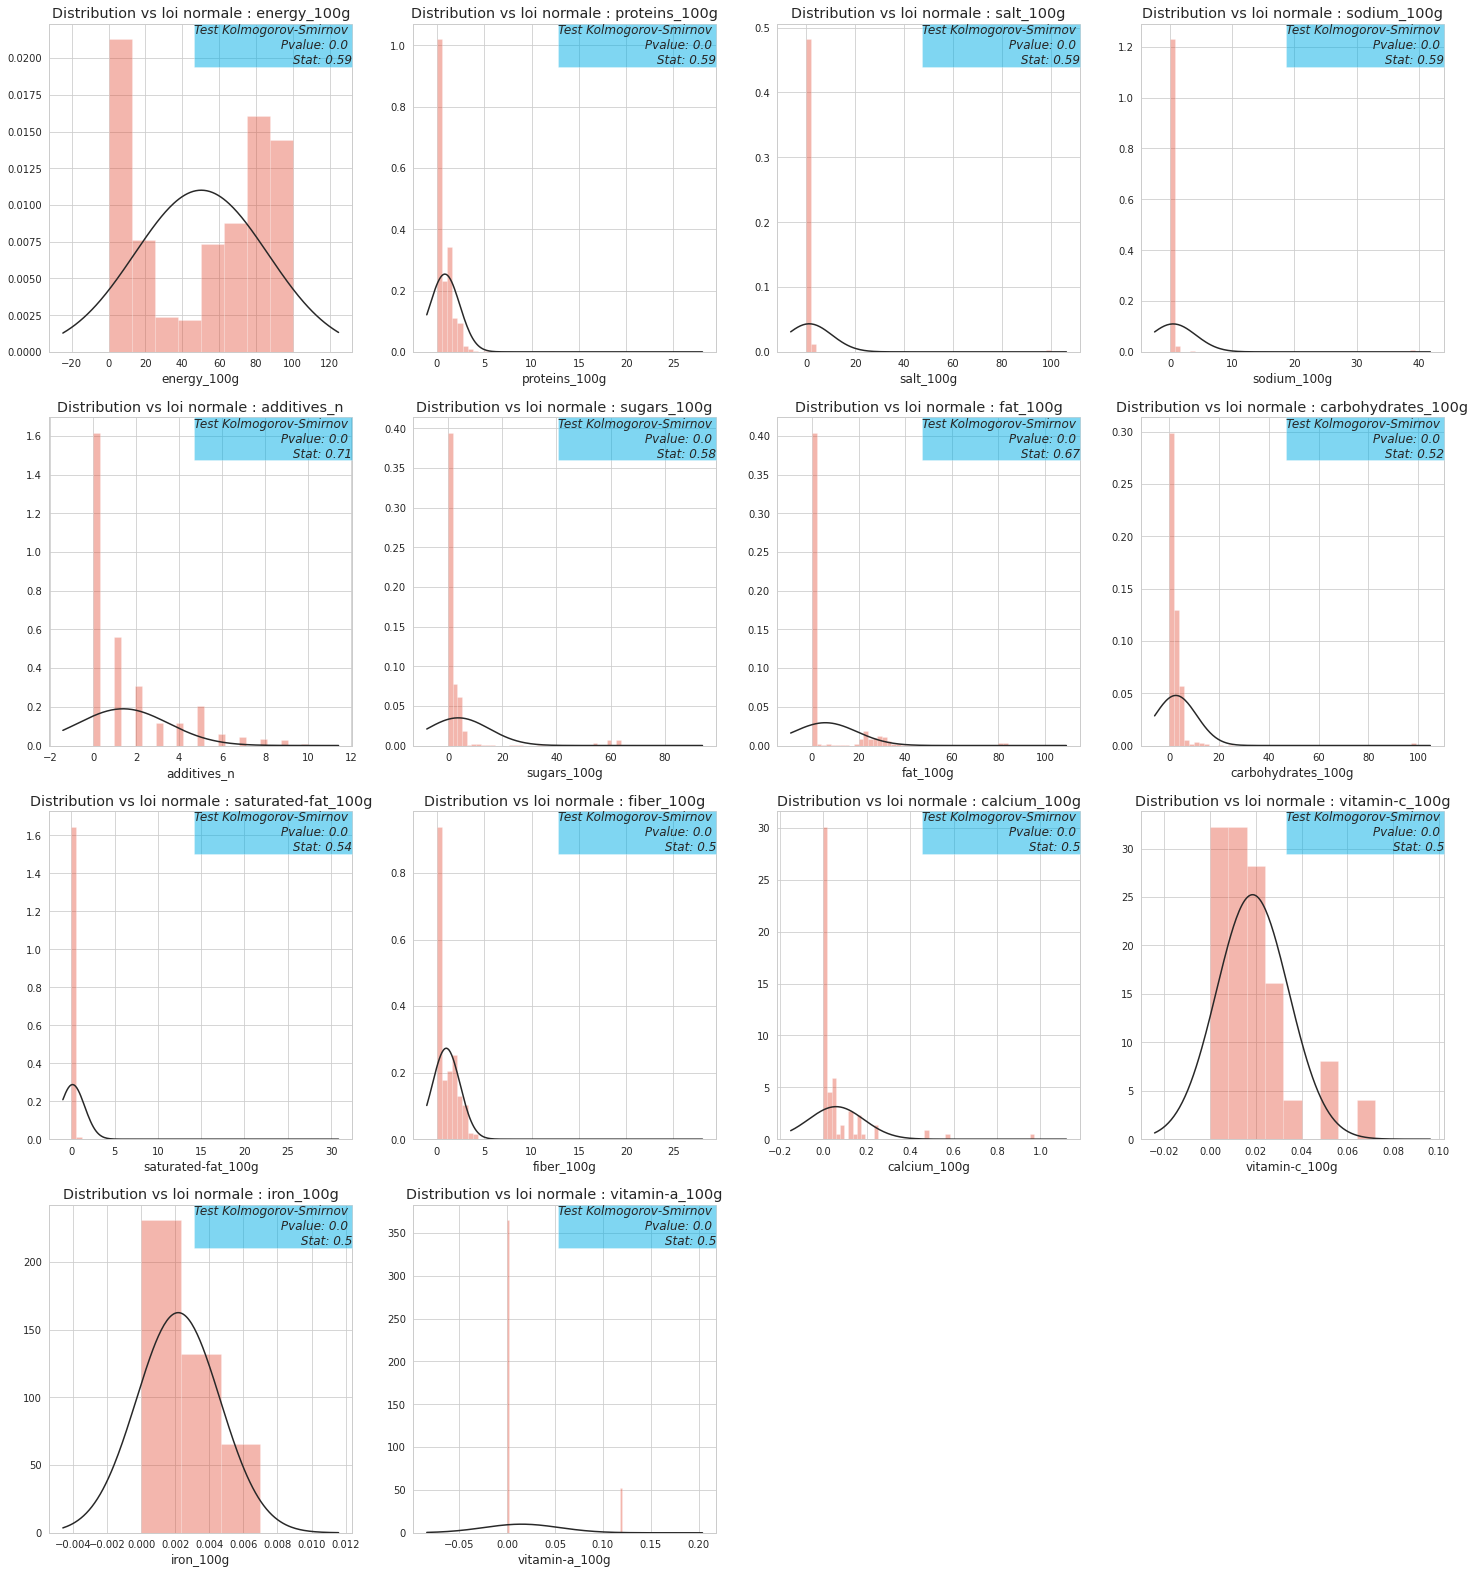

In [88]:
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
fig = plt.figure(figsize=(25,35))

sub = 0
for i in range(len(colonnes_numeric)):
    fig.add_subplot(5,4,i+1)
    
    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height

    colonne = colonnes_numeric[i]
    kstest = stats.kstest(df_filtre[colonne].notnull(),'norm')
    ax = sns.distplot(df_filtre[colonne], fit=stats.norm, kde=False)
    ax.set_title("Distribution vs loi normale : {}".format(colonne))
    ax.text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=ax.transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})
    sub += 1
plt.show()
    

En se basant sur les résultats des tests de Kolmogorov-Smirnov (Pvalue < au niveau de test de 5%) on rejette donc l'hypothèse de normalité des distributions de ces variables. Il ne serait donc pas judicieux d'imputer les valeurs manquantes par la moyenne.  
Nous allons analyser la distribution en focntion des categories

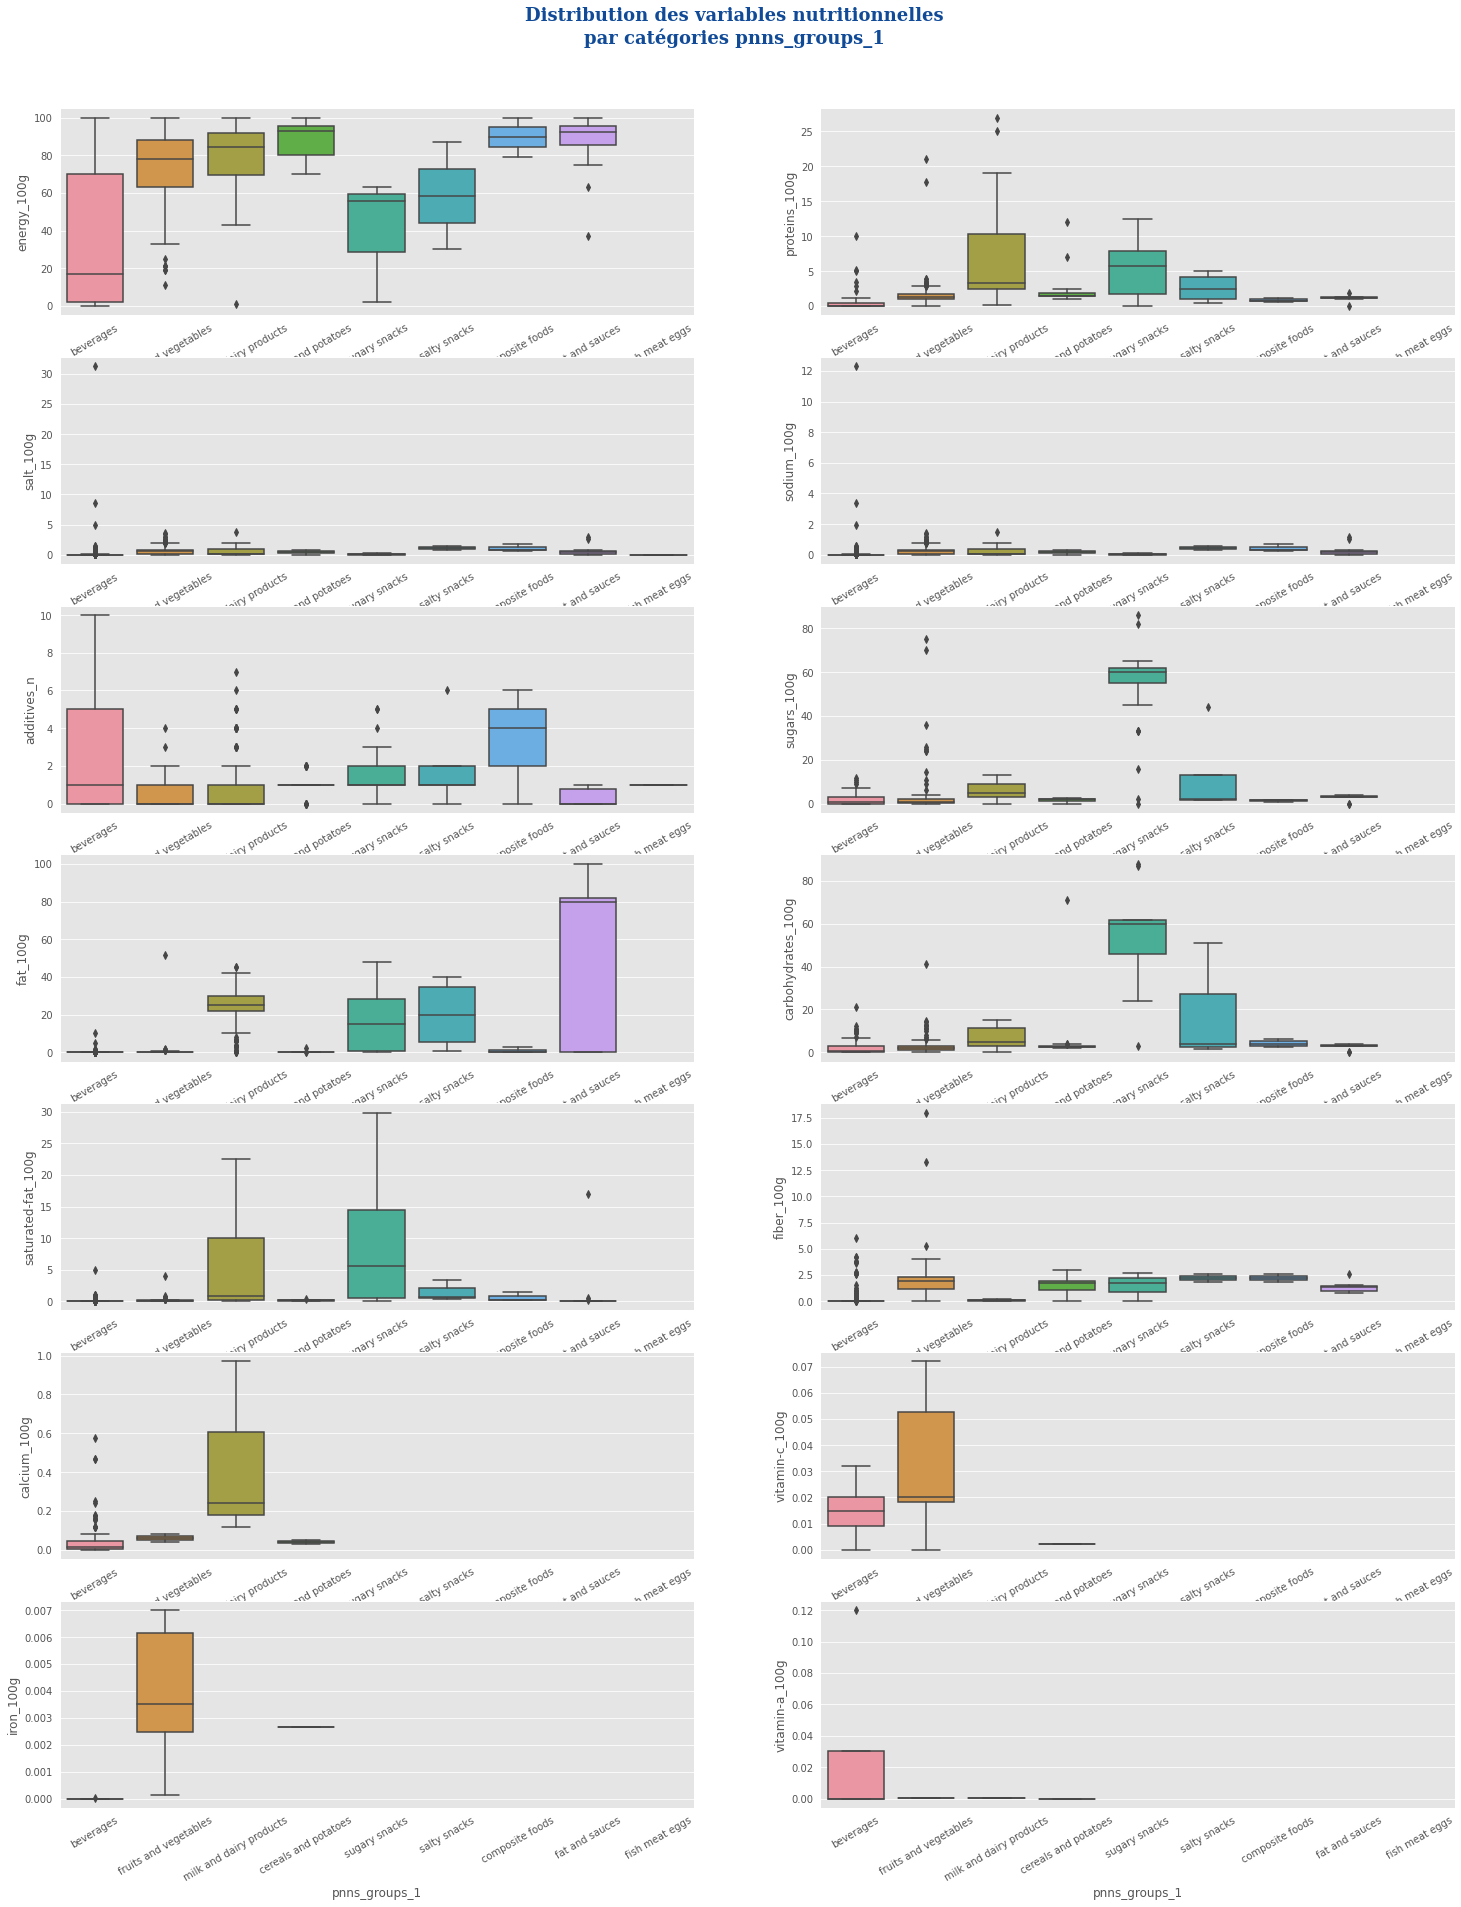

In [89]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(25,45))

sub = 0
for i in range(len(colonnes_numeric)):
    fig.add_subplot(10,2,i+1)
    colonne = colonnes_numeric[i]
    ax = sns.boxplot(x="pnns_groups_1", y=colonne, data=df_filtre[df_filtre["pnns_groups_1"]!="unknown"])
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    sub += 1

fig.text(0.5, 0.90, r"Distribution des variables nutritionnelles" "\n" "par catégories pnns_groups_1", ha="center", 
         fontdict=font_title)
plt.show()

In [90]:
df_filtre[colonnes_numeric].isnull().sum()

energy_100g            543
proteins_100g          539
salt_100g              543
sodium_100g            545
additives_n            289
sugars_100g            564
fat_100g               374
carbohydrates_100g     682
saturated-fat_100g     647
fiber_100g            1002
calcium_100g          2021
vitamin-c_100g        2103
iron_100g             2121
vitamin-a_100g        2126
dtype: int64

Les distributions étant asymetriques et ne suivant pas la loi normale, les valeurs dans les colonnes calcium_100g, vitamin-c_100g, vitamin-a_100g, iron_100g seront remplacées par la médiane car elles ont un grand nombre de valeurs manquantes, toutes les autres seront remplcées par l'algorith des K Nearest Neighbours (KNN)

In [91]:
df_filtre['calcium_100g'] = df_filtre['calcium_100g'].fillna(df_filtre['calcium_100g'].median())
df_filtre['vitamin-c_100g'] = df_filtre['vitamin-c_100g'].fillna(df_filtre['vitamin-c_100g'].median())
df_filtre['vitamin-a_100g'] = df_filtre['vitamin-a_100g'].fillna(df_filtre['vitamin-a_100g'].median())
df_filtre['iron_100g'] = df_filtre['iron_100g'].fillna(df_filtre['iron_100g'].median())

In [92]:
# KNN pour les autres variables
from sklearn.impute import KNNImputer

# On entraine le modèle d'imputation sur un échantillon de données
colonnes_knn = ['energy_100g','proteins_100g','saturated-fat_100g','sugars_100g','salt_100g','sodium_100g','additives_n','fat_100g','carbohydrates_100g','fiber_100g']
echantillon = df_filtre[colonnes_knn].sample(frac=0.25, random_state=1)
imputer = KNNImputer(n_neighbors=3, missing_values=np.nan)
imputer.fit(echantillon)

KNNImputer(n_neighbors=3)

Aucun produit ne presente à la fois ni nom ni catégorie



In [93]:
# Puis on applique le modèle sur l'ensemble des données
df_impute = imputer.transform(df_filtre[colonnes_knn])
df_impute = pd.DataFrame(df_impute, columns=colonnes_knn)

In [94]:
for col_knn in colonnes_knn:
    df_filtre[col_knn] = df_impute[col_knn].values

In [95]:
df_filtre.isnull().sum().sort_values(ascending=False)


trans-fat_100g                             2130
cholesterol_100g                           2125
serving_size                               1390
additives_fr                               1250
nutrition-score-fr_100g                     658
nutrition_grade_fr                          658
image_url                                   496
image_small_url                             496
ingredients_from_palm_oil_n                 289
ingredients_that_may_be_from_palm_oil_n     289
ingredients_text                            289
packaging                                   231
quantity                                    177
brands                                        6
product_name                                  5
fiber_100g                                    0
vitamin-c_100g                                0
calcium_100g                                  0
pnns_groups_1                                 0
categories_fr                                 0
main_category_fr                        

In [96]:
#df_filtre_nettoye = df_filtre[(df_filtre['product_name'].isnull()) & ((df_filtre['pnns_groups_1'] == 'inconnu') | (df_filtre['main_category_fr'] == 'inconnu'))]
#df_filtre_nettoye

In [97]:
#df_filtre_nettoye[((df_filtre_nettoye.pnns_groups_1 == "inconnu") & (df_filtre_nettoye.main_category_fr == "inconnu") &
#              (df_filtre_nettoye.pnns_groups_2 == "inconnu") & (df_filtre_nettoye.categories_fr == "inconnu"))].shape

In [100]:
#On remplace les valeurs manquantes du nom de produit et la marque par un message générique d'indisponibilité
df_filtre['product_name'].fillna(value='Nom du produit indisponible', inplace=True)
df_filtre['brands'].fillna(value='Marque indisponible', inplace=True)

In [101]:
df_filtre.isnull().sum().sort_values(ascending=False)

trans-fat_100g                             2130
cholesterol_100g                           2125
serving_size                               1390
additives_fr                               1250
nutrition_grade_fr                          658
nutrition-score-fr_100g                     658
image_url                                   496
image_small_url                             496
ingredients_text                            289
ingredients_that_may_be_from_palm_oil_n     289
ingredients_from_palm_oil_n                 289
packaging                                   231
quantity                                    177
pnns_groups_2                                 0
vitamin-a_100g                                0
iron_100g                                     0
pnns_groups_1                                 0
calcium_100g                                  0
categories_fr                                 0
main_category_fr                              0
fiber_100g                              

Nous devons gerer les valeurs manquantes nutrition-score-fr_100g

### **3.&nbsp;Analyse exploratoire**